In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import matplotlib.ticker as ticker
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.decomposition import PCA

In [5]:
data = pd.read_excel("./dairy_nutrition_8.xlsx")
data = data.drop(columns=['Description'])
data.head()

FileNotFoundError: [Errno 2] No such file or directory: './dairy_nutrition_8.xlsx'

In [ ]:
scaler = StandardScaler()
scaler.fit(data.loc[:,'Protein_g':])
data.loc[:,'Protein_g':] = scaler.transform(data.loc[:,'Protein_g':])
standard_data = pd.DataFrame(normalize(data.loc[:,'Protein_g':]), columns = list(data.columns[1:]))
standard_data.head()

,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
0,0.361397,0.480902,-0.120777,-0.330557,-0.481184,0.420394,0.259366,0.196803
1,-0.533214,0.450277,0.040676,0.013470,0.301308,-0.230873,-0.391542,-0.462282
2,-0.387873,-0.529219,0.596222,0.045445,0.041389,-0.265712,-0.193042,-0.319930
3,-0.515515,-0.455405,-0.282134,-0.128159,-0.335618,-0.256614,-0.268767,-0.424382
4,-0.515613,-0.454554,-0.283024,-0.128183,-0.335682,-0.256663,-0.268819,-0.424463


In [ ]:
# Computes the PCs and percentage variance explained
# Pass original data and returns of PCA to this function.
# This function returns a table summarising the eigenvalues, % variance explained, cumulative % variance explained and PCs

def pca_results(data, pca):
    
    # Dimension indexing
    dimensions = ['PC {}'.format(i) for i in range(1,len(pca.components_)+1)]
    
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = data.keys()) 
    components.index = dimensions

    #PCA eigenvalues
    ev = pca.explained_variance_.reshape(len(pca.components_), 1)
    eigenvalues = pd.DataFrame(np.round(ev, 4), columns = ['Eigenvalue']) 
    eigenvalues.index = dimensions
    
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1) 
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance']) 
    variance_ratios.index = dimensions

    # Return a concatenated DataFrame
    return pd.concat([eigenvalues, variance_ratios, components], axis = 1)

In [ ]:
# This function plots the loading plot.
# Pass original data dataframe and returns of PCA to this function. Optional width, height and margin
# This function returns the axes of the loading plot

def loadingplot(data, pca, width=10, height=10, margin=0.5):

    fig, ax = plt.subplots(figsize = (width,height))

    #Set limits for figure
    x_min = min(pca.components_[0,:].min(),0)-margin
    x_max = max(pca.components_[0,:].max(),0)+margin
    y_min = min(pca.components_[1,:].min(),0)-margin
    y_max = max(pca.components_[1,:].max(),0)+margin

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    #Scaling factor for text position
    text_pos = 0.02

    for i, v in enumerate(pca.components_.T):
        ax.arrow(0, 0, v[0], v[1], head_width=0.01, head_length=0.01, linewidth=2, color='red')
        ax.text(v[0], v[1]+text_pos, data.columns[i+1], color='black', ha='center', va='center', fontsize=12)

    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    ax.set_xlabel("PC1", fontsize=14)
    ax.set_ylabel("PC2", fontsize=14)
    ax.set_title("Loading plot", fontsize = 14)
    
    return ax

In [ ]:
# Plots score plot with data labels
# Pass original data, un-centred scores and returns of PCA to this function. Optional width, height and margin.
# This function returns the axes of the score plot

def scoreplot_label(data, scores, pca, width=10, height=10, margin=0.5, type=None):
    
    fig, ax = plt.subplots(figsize = (width,height))
    
    #Set limits for figure
    x_min = min(scores['PC1'].min(),0)-margin
    x_max = max(scores['PC1'].max(),0)+margin
    y_min = min(scores['PC2'].min(),0)-margin
    y_max = max(scores['PC2'].max(),0)+margin
  
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_title("Score plot", fontsize=14)
    plt.plot([x_min, x_max], [0, 0], color='k', linestyle='--', linewidth=1)
    plt.plot([0, 0], [y_min, y_max], color='k', linestyle='--', linewidth=1)
    
    if type is not None and isinstance(type, pd.Series):
        df = pd.concat([scores, type], axis=1)
        sns.scatterplot(x=df.iloc[:,0], y=df.iloc[:,1], hue=df[type.name])
        plt.legend(
            loc='upper center', 
            bbox_to_anchor=(0.5,-0.05), 
            fancybox=True, 
            ncol=5)
    else:
        return ax

In [ ]:
pca = PCA(n_components=8).fit(data.loc[:,'Protein_g':])
#Note that pca.transform() returns scores based on centred data
pca_samples = pca.transform(data.loc[:,'Protein_g':])

pca_results = pca_results(data.loc[:,'Protein_g':], pca)
display(pca_results)

,Eigenvalue,Explained Variance,Protein_g,Fat_g,Carb_g,Sugar_g,VitA_mcg,VitB6_mg,VitB12_mcg,Calcium_mg
PC 1,3.7425,0.4650,0.4734,0.2935,0.0550,0.0792,0.3641,0.3609,0.4424,0.4710
PC 2,2.1631,0.2688,-0.1058,-0.3245,0.6230,0.6058,-0.1766,0.2494,0.1693,-0.0796
PC 3,0.9173,0.1140,0.1581,-0.5733,-0.2880,-0.3350,-0.4780,0.3482,0.2988,0.1104
PC 4,0.4739,0.0589,-0.3451,-0.0490,-0.0872,-0.1739,0.4780,0.6570,-0.0348,-0.4235
PC 5,0.3313,0.0412,0.0020,-0.6678,-0.0642,0.0471,0.6112,-0.3752,0.0599,0.1725
PC 6,0.1957,0.0243,-0.2056,0.1356,0.2290,-0.3145,0.0126,-0.3279,0.7589,-0.3230
PC 7,0.1452,0.0180,0.3807,-0.1046,0.6441,-0.5630,0.0612,0.0265,-0.3223,-0.0630
PC 8,0.0792,0.0098,-0.6583,0.0464,0.2168,-0.2570,-0.0418,0.0753,-0.0423,0.6650


<Figure size 432x288 with 0 Axes>

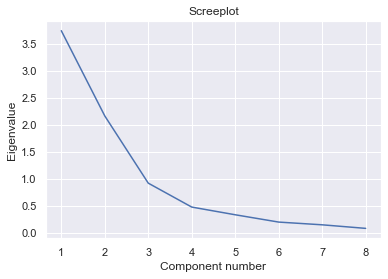

In [ ]:
#Scree plot

plt.clf()
fig1, ax1 = plt.subplots()
ax1.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax1.set(xlabel = 'Component number', ylabel = 'Eigenvalue', title = 'Screeplot')
plt.show()

In [ ]:
pca_results = pca_results.iloc[:2]
display(pca_results)

NameError: name 'pca_results' is not defined

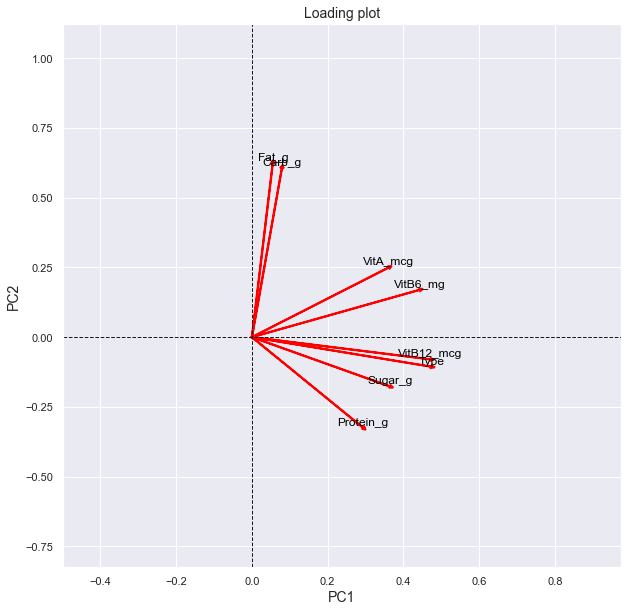

In [ ]:
ax2 = loadingplot(data, pca) 
plt.show()

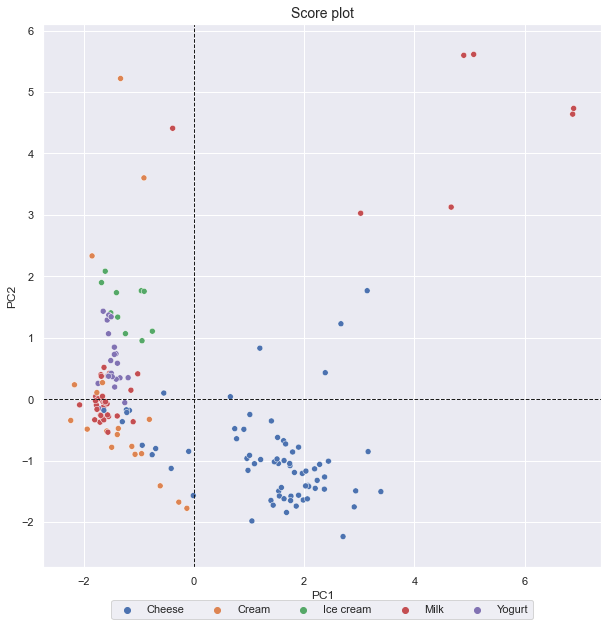

In [ ]:
scores_notcentred = np.dot(data.loc[:,'Protein_g':], pca.components_.T)
scores_notcentred = pd.DataFrame(scores_notcentred, columns = ["PC1","PC2","PC3","PC4","PC5","PC6","PC7","PC8"])
scores_notcentred = scores_notcentred.iloc[:,:3]

ax = scoreplot_label(data, scores_notcentred[["PC1","PC2"]], pca = pca, type = data["Type"])